In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
bankData = pd.read_csv("bank-full.csv")
bankData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
bankData.shape

(45211, 17)

In [4]:
# dropping the duration column because it is not relevant
bankData.drop(columns=['duration'],inplace=True)

bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [5]:
#There are 6 integer types, 9 category types. the category types need to be converted into integers

In [6]:
# check for missing values
bankData.isnull().sum().T

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [7]:
#there are no null values

In [8]:
# perform 5 point summary for numerical attributes
bankData.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


data analysis : age distribution - looks good and has a spread which is wide. 

Balance - there are some negative balances but this is valid because the account will allow overdraft type of scenario.

Day - looks good
campaign - looks good
pdays - has negative values, we will make it 0 because -1 does not mean anything
previous - also has negative values , we will make it 0 because -1 does not mean anything

<function matplotlib.pyplot.show(*args, **kw)>

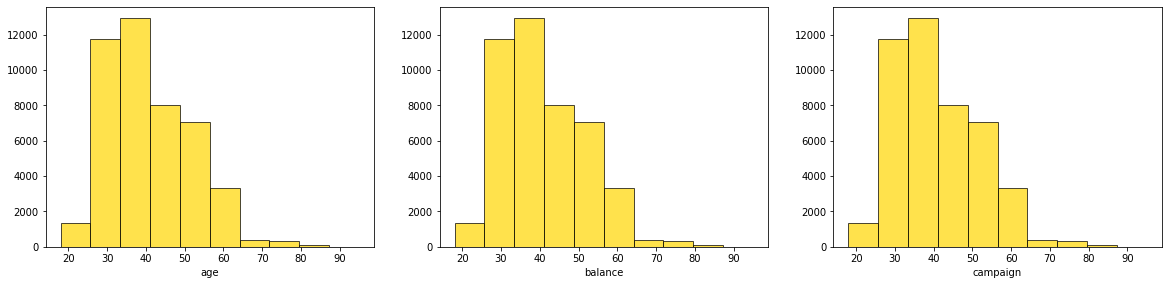

In [92]:
#exploratory data analysis
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(bankData.age, color='gold', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')


plt.subplot(3,3,2)
plt.hist(bankData.age, color='gold', edgecolor = 'black', alpha = 0.7)
plt.xlabel('balance')

plt.subplot(3,3,3)
plt.hist(bankData.age, color='gold', edgecolor = 'black', alpha = 0.7)
plt.xlabel('campaign')

plt.show

In [ ]:
# Things not clear, so need more exploration.

<function matplotlib.pyplot.show(*args, **kw)>

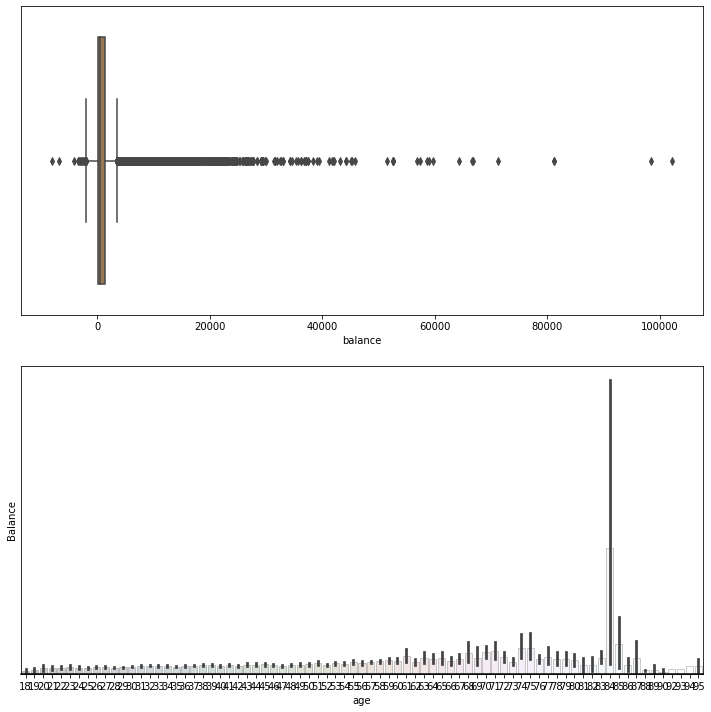

In [56]:
# Outlier detection for Balance
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=False)

sns.boxplot(x="balance", data=bankData,palette="cubehelix",ax=ax1)

sns.barplot(x="age", y="balance", data=bankData,palette="cubehelix",ax=ax2,edgecolor = 'black',alpha = 0.2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Balance")

plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

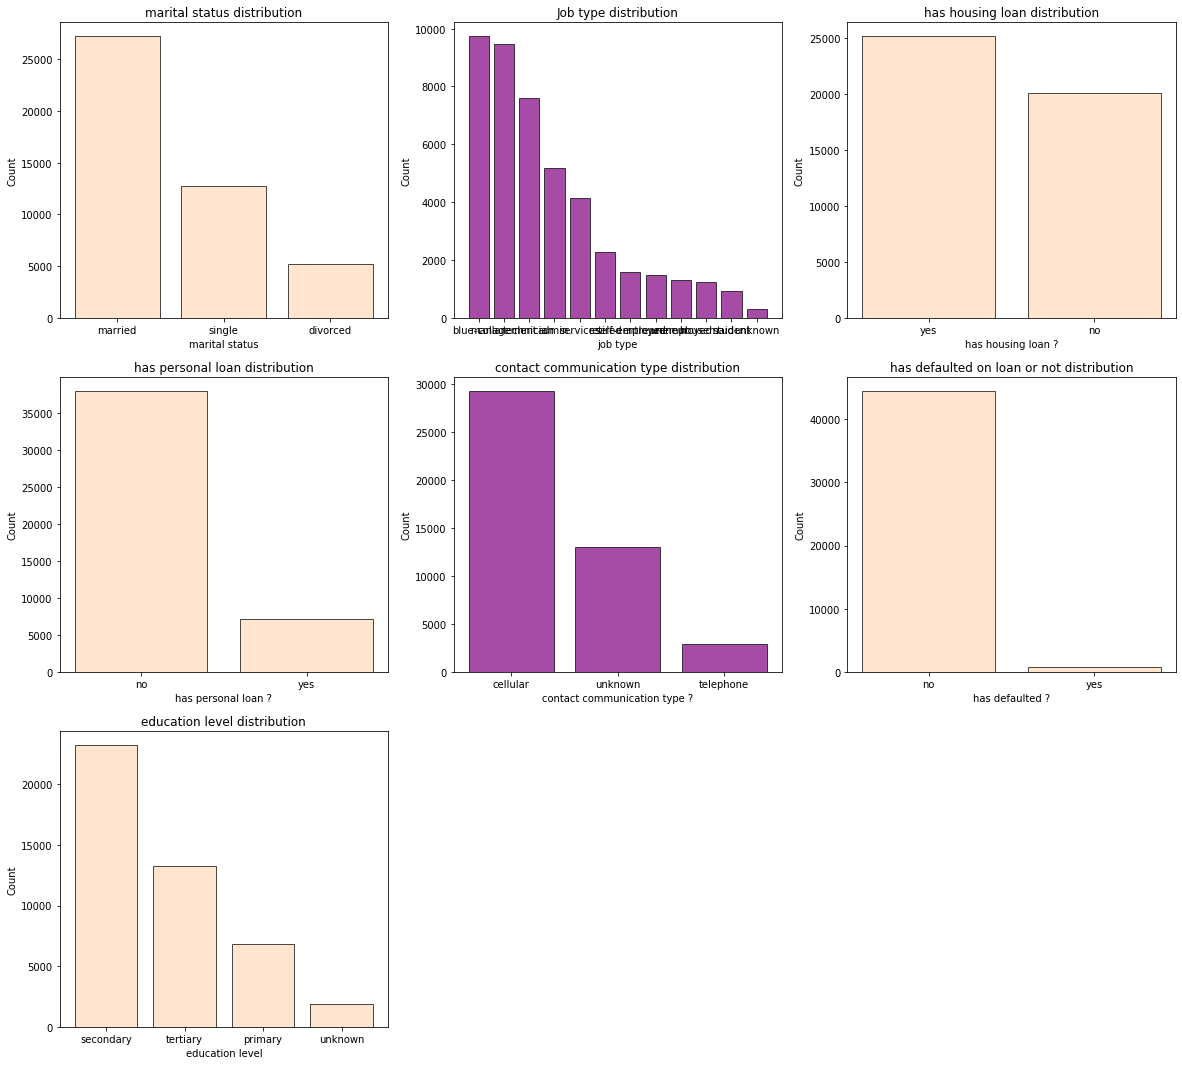

In [91]:
plt.figure(figsize=(20,25))

x1 = bankData.marital.value_counts().index
y1 = [bankData['marital'].value_counts()[j] for j in x1] 
plt.subplot(4,3,1)
plt.bar(x1,y1, align='center',color = 'peachpuff',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('marital status')
plt.ylabel('Count')
plt.title('marital status distribution')


x1 = bankData.job.value_counts().index
y1 = [bankData['job'].value_counts()[j] for j in x1] 
plt.subplot(4,3,2)
plt.bar(x1,y1, align='center',color = 'purple',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('job type')
plt.ylabel('Count')
plt.title('Job type distribution')

x1 = bankData.housing.value_counts().index
y1 = [bankData['housing'].value_counts()[j] for j in x1] 
plt.subplot(4,3,3)
plt.bar(x1,y1, align='center',color = 'peachpuff',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('has housing loan ?')
plt.ylabel('Count')
plt.title('has housing loan distribution')

x1 = bankData.loan.value_counts().index
y1 = [bankData['loan'].value_counts()[j] for j in x1] 
plt.subplot(4,3,4)
plt.bar(x1,y1, align='center',color = 'peachpuff',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('has personal loan ?')
plt.ylabel('Count')
plt.title('has personal loan distribution')
plt.show

x1 = bankData.contact.value_counts().index
y1 = [bankData['contact'].value_counts()[j] for j in x1] 
plt.subplot(4,3,5)
plt.bar(x1,y1, align='center',color = 'purple',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('contact communication type ?')
plt.ylabel('Count')
plt.title('contact communication type distribution')


x1 = bankData.default.value_counts().index
y1 = [bankData['default'].value_counts()[j] for j in x1] 
plt.subplot(4,3,6)
plt.bar(x1,y1, align='center',color = 'peachpuff',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('has defaulted ?')
plt.ylabel('Count')
plt.title('has defaulted on loan or not distribution')

x1 = bankData.education.value_counts().index
y1 = [bankData['education'].value_counts()[j] for j in x1] 
plt.subplot(4,3,7)
plt.bar(x1,y1, align='center',color = 'peachpuff',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('education level')
plt.ylabel('Count')
plt.title('education level distribution')

plt.show

# Comments :- 
# There is a lot of skewness in the 'balance' 'age' , 'marital status','loan default status'distribution on the data set. 
# 'Job' ,'has housing loan' , 'educational level' type distribution in the data set looks ok. 
# the unknowns will be considered as dummy.

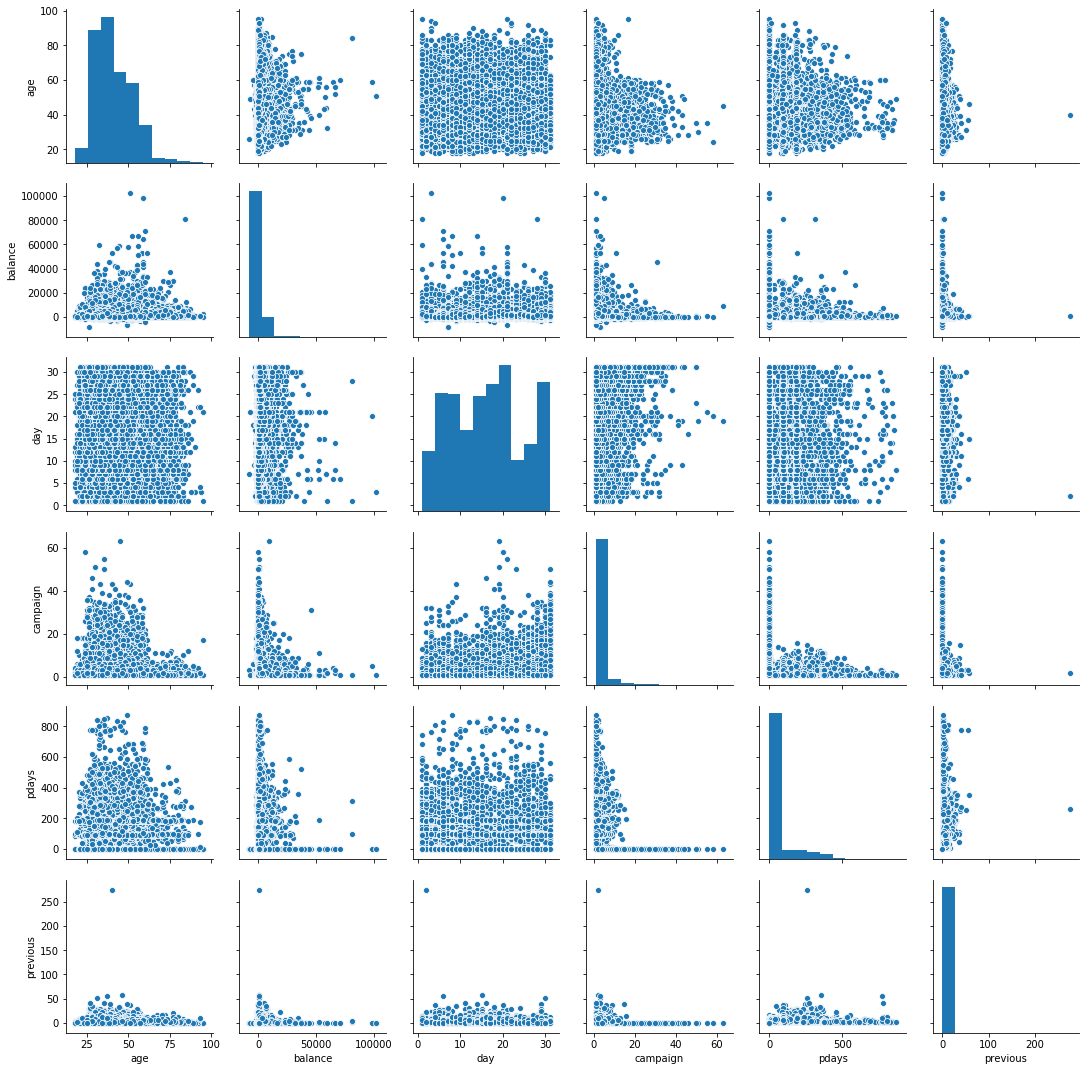

In [11]:
# pair plot of all the numerical dimensions
import seaborn as sns
df_attr = bankData.iloc[:,0:17] #compare all attributes visually to check for relationships that can be exploited

sns.pairplot(bankData)



#Exploratory data analysis: Age has correlation with attributes such as balance, campaign. 
# previous balance has slight correlation with age, pdays, campaign

In [12]:
# print values for categorical variables to determine the values to be replaced
print('job==\n',bankData.job.value_counts())
print('marital==\n',bankData.marital.value_counts())
print('education==\n',bankData.education.value_counts())
print('default==\n',bankData.default.value_counts())
print('housing==\n',bankData.housing.value_counts())
print('loan==\n',bankData.loan.value_counts())
print('contact==\n',bankData.contact.value_counts())
print('month==\n',bankData.month.value_counts())
print('poutcome==\n',bankData.poutcome.value_counts())
print('target==\n',bankData.Target.value_counts())


job==
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
marital==
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
education==
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
default==
 no     44396
yes      815
Name: default, dtype: int64
housing==
 yes    25130
no     20081
Name: housing, dtype: int64
loan==
 no     37967
yes     7244
Name: loan, dtype: int64
contact==
 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
month==
 may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
poutcome==
 unkno

In [13]:
# Different categorical values have been analysed. 
# replace all categorical variables with a numeric series. replace all -1's with 0
replaceStruct = {
                "education":      {"tertiary":3,
"secondary":2,
"primary":1,
"unknown":0},
                "default":      {"yes":1,
"no":0,
  },
                "housing":      {"no":0,
"yes":1,
},
                "loan":      {"no":0,
"yes":1,
},
                "poutcome":      {"unknown":0,
"failure":2,
"other":3,
"success":4 },
    "pdays":      {-1:0},
    "previous":  {-1:0}
}

oneHotCols=["job","marital","contact","month"]

In [14]:
## all 'unknowns' categorical values have been marked as 0 to reduce the impact. All -1 will be replaced with 0
prunedData_tmp=bankData.replace(replaceStruct)
prunedData=pd.get_dummies(prunedData_tmp, columns=oneHotCols)

prunedData.head(10)

,age,education,default,balance,housing,loan,day,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,3,0,2143,1,0,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,2,0,29,1,0,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,0,2,1,1,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,0,1506,1,0,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,0,1,0,0,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5,35,3,0,231,1,0,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,28,3,0,447,1,1,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,42,3,1,2,1,0,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8,58,1,0,121,1,0,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9,43,2,0,593,1,0,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [15]:
prunedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 42 columns):
age                  45211 non-null int64
education            45211 non-null int64
default              45211 non-null int64
balance              45211 non-null int64
housing              45211 non-null int64
loan                 45211 non-null int64
day                  45211 non-null int64
campaign             45211 non-null int64
pdays                45211 non-null int64
previous             45211 non-null int64
poutcome             45211 non-null int64
Target               45211 non-null object
job_admin.           45211 non-null uint8
job_blue-collar      45211 non-null uint8
job_entrepreneur     45211 non-null uint8
job_housemaid        45211 non-null uint8
job_management       45211 non-null uint8
job_retired          45211 non-null uint8
job_self-employed    45211 non-null uint8
job_services         45211 non-null uint8
job_student          45211 non-null uint8
job_tech

In [16]:
X = prunedData.drop("Target" , axis=1)
y = prunedData.pop("Target")

In [17]:
# could get better results with a model with a test size of 0.6 and train size=0.4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.70, random_state=1)

In [18]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

## Build SVM for different hyper parameters - gamma, C and kernel.

In [20]:
# We will perform same experiment with GridSearch
#from sklearn import svm
#from sklearn.model_selection import GridSearchCV
# for kernel='rbf' gamma=auto,scaled. C=1,10,100,1000
# for kernel='poly' gamma='auto,scaled' C=1,10,100,1000, degree =2,3,5,10

#parameters = {'kernel':('poly', 'rbf'), 'C':(1,10,100,1000),'cache_size':[3000],'gamma':['scale']}
#svc = svm.SVC()
#print(svc.get_params())
#clf = GridSearchCV(svc, parameters,n_jobs= -1)
#clf.fit(X_train_scaled, y_train)
#print(clf.score(X_train_scaled, y_train))
#print(clf.score(X_test_scaled, y_test)) 


In [33]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train_scaled, y_train)

predictions=model.predict(X_test_scaled)

#Assess the accuracy of the model on test data
print(metrics.confusion_matrix(y_test,predictions))
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

[[25009  2941]
 [ 2161  1537]]
              precision    recall  f1-score   support

          no       0.90      0.95      0.93     27950
         yes       0.39      0.22      0.28      3698

    accuracy                           0.87     31648
   macro avg       0.65      0.59      0.61     31648
weighted avg       0.84      0.87      0.85     31648



In [21]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
NNH.fit(X_train_scaled, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [22]:
predicted_labels = NNH.predict(X_test_scaled)
print(metrics.confusion_matrix(y_test, predicted_labels))
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

[[26668  1282]
 [ 2878   820]]
              precision    recall  f1-score   support

          no       0.90      0.95      0.93     27950
         yes       0.39      0.22      0.28      3698

    accuracy                           0.87     31648
   macro avg       0.65      0.59      0.61     31648
weighted avg       0.84      0.87      0.85     31648



In [ ]:
# precision and f1 scores are high for both the algorithms. However the false positives are significantly high,
# neither of the classification algorithms are able to predict the negative case correctly.

#  Decision Tree Model and its variants such as Bagging, Adaboosting, gadient boosting. 
# Grid search will be used for getting the optimal set of hyper parameters.
          

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dTree = DecisionTreeClassifier()
parameters = {'criterion':('entropy', 'gini'), 'random_state':[1],'max_depth':range(3,20,2)}

clf = GridSearchCV(dTree, parameters,n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8925753889257539
0.8927578361981799


In [26]:
# Build Decision Tree Model  - Bagging algorithm using Grid search

from sklearn.ensemble import BaggingClassifier
parameters = {'n_estimators':(5,10,15,20),'max_samples':(5,10,100,500,1000),'max_features':(3,5,7,9)}

bgcl = BaggingClassifier()
clf = GridSearchCV(bgcl, parameters,n_jobs=-1)
clf.fit(X_train_scaled, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8826955688269557
0.8831521739130435


In [27]:
# Build Decision Tree Model  - Ada boosting algorithm using Grid search

from sklearn.ensemble import AdaBoostClassifier
parameters = {'learning_rate':(0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.5,1), 'n_estimators':(50,100, 200, 300, 400)}

abcl = AdaBoostClassifier()
clf = GridSearchCV(abcl, parameters,n_jobs=-1)
clf.fit(X_train_scaled, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))



/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8655902086559021
0.8658051061678463


In [28]:
# Build Decision Tree Model  - Gradient Boost algorithm using grid search
from sklearn.ensemble import GradientBoostingClassifier
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.1,1],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 1.0],
    "n_estimators":[10]
    }

gbcl = GradientBoostingClassifier()
clf = GridSearchCV(gbcl, parameters,n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8878566688785667
0.8861223458038423


#  Build random forest model using Random Search

In [29]:
from sklearn.ensemble import RandomForestClassifier
parameters = {
                "n_estimators":[10,50,100,500,1000], 
                 "max_depth":[3,5,8],
                 "max_features":["log2","sqrt"], 
                 "verbose":[2],
                 "random_state":[1000]
                }

rfcl = RandomForestClassifier()
clf = GridSearchCV(rfcl, parameters,n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.9021602890216028
0.8940217391304348


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.4s finished


# Build model using voting classifier

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[
                ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
                voting='soft')
 
params = {'lr__C': [1.0, 100.0],
              'voting': ['soft', 'hard'],
              'weights': [[0.5, 0.5, 0.5], [1.0, 0.5, 0.5]]}
 
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid.fit(X_train, y_train)
print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))



/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mit

/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mit

/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mithunmp/installs/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mit

0.9221411192214112
0.8897244691607684


In [ ]:
# SVM for classification also was tried but even after a few hours the algo did not complete. 
# So the code is commented out.
# 
# When comparing all the ensemble techniques, it was found that the Random forest and voting classifiers performed 
# slightly better than the decision tree and its variants. 